<a href="https://colab.research.google.com/github/ayobamialimi/DataScienceEcosystem/blob/main/Pickle%26joblib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [5]:
df = pd.read_csv("canada_per_capita_income.csv")
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [6]:
df.tail()

,year,per capita income (US$)
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [7]:
df.rename(columns={'per capita income (US$)': 'per_capita_income_usd'}, inplace=True)
df.head()

,year,per_capita_income_usd
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


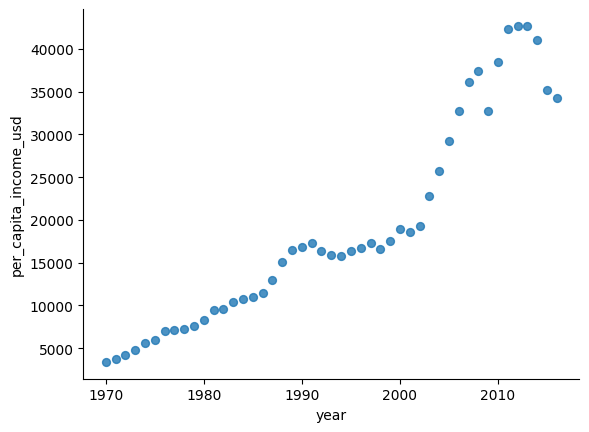

In [8]:
# @title year vs per capita income (US$)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='year', y='per_capita_income_usd', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

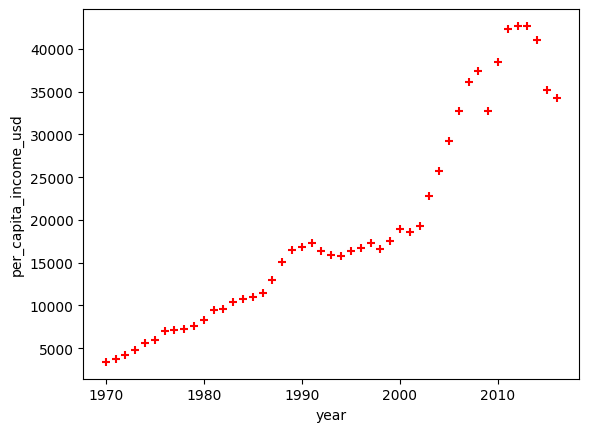

In [9]:
#plot to see if the dataset follow a linear regression model

%matplotlib inline
plt.xlabel('year')
plt.ylabel('per_capita_income_usd')
plt.scatter(df.year, df.per_capita_income_usd, color='red', marker='+')

In [10]:
# code for linear regression
reg = linear_model.LinearRegression()
reg.fit(df[['year'] ], df['per_capita_income_usd'])

LinearRegression()

In [ ]:
# code for prediction

reg.predict([[2030]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49573.34484664])

In [ ]:
# alternate way to make prediction
# Reshape the input into a 2D array
year_prediction = np.array([2030]).reshape(-1, 1)

In [ ]:
# Make the prediction
prediction = reg.predict(year_prediction)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([49573.34484664])

In [11]:
# coefficient of the slope
reg.coef_

array([828.46507522])

In [ ]:
# y intercept
reg.intercept_

-1632210.7578554575

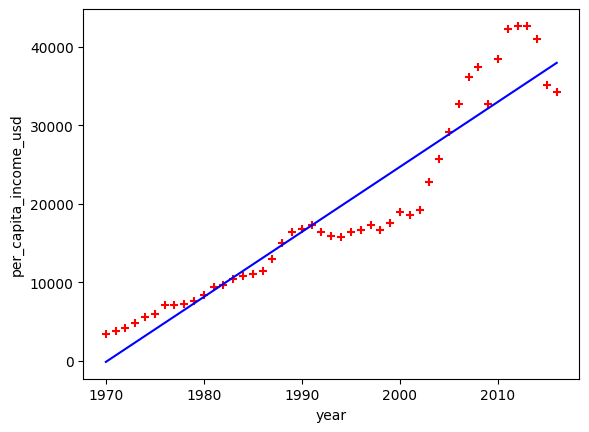

In [ ]:
#plot to see if the preditio versus the original dataset

%matplotlib inline
plt.xlabel('year')
plt.ylabel('per_capita_income_usd')
plt.scatter(df.year, df.per_capita_income_usd, color='red', marker='+')
plt.plot(df.year, reg.predict(df[['year']]), color = 'blue')

In [ ]:
# load a new data frame for years to make prediction
df2 = pd.read_csv('year_prediction.csv')
df2.head()

,year
0,2030
1,2031
2,2032
3,2033
4,2034


In [ ]:
# make prediction on the data frame
prediction_2 = reg.predict(df2)

In [ ]:
# This create a new column in the dataframe and assgn the prediction values
df2['per_capita_income_usd'] = prediction_2

In [ ]:
df2.head()

,year,per_capita_income_usd
0,2030,49573.344847
1,2031,50401.809922
2,2032,51230.274997
3,2033,52058.740072
4,2034,52887.205148


In [ ]:
#export the df2 file
df2.to_csv("year_prediction_2.csv", index=False)

In [12]:
# save and load training model

import pickle

In [13]:
# this create the model file and dump the training model inside the file
with open('reg_pickle', 'wb') as f:
  pickle.dump(reg,f)

In [15]:
# load the model for prediction purposes
with open('reg_pickle', 'rb') as f:
  model = pickle.load(f)

In [21]:
# make prediction
# Reshape the input data to a 2D array with a single sample
input_data = np.array([2020]).reshape(1, -1)

# Now, you can use the reshaped input data to make predictions
predictions = model.predict(input_data)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [31]:
!pip install joblib

In [33]:
#Using joblib to predict

import joblib
from joblib import dump, load

In [34]:
# this create the model file and dump the training model inside the file
joblib.dump(model,'reg_joblib')

['reg_joblib']

In [36]:
# load the model for prediction

mj = joblib.load('reg_joblib')

In [37]:
# make prediction

mj.predict(input_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [38]:
mj.coef_

array([828.46507522])

In [39]:
model.coef_

array([828.46507522])

In [40]:
mj.intercept_

-1632210.7578554575

In [41]:
model.intercept_

-1632210.7578554575